In [79]:
import cv2 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 

In [96]:
def magnitude_gradient(image, kernel=3, min_thres=0, max_thres=255):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=kernel)
    abs_sobel = np.sqrt(np.power(sobelx, 2)+np.power(sobely, 2))
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= min_thres) & (scaled_sobel <= max_thres)] = 1
    return binary_output

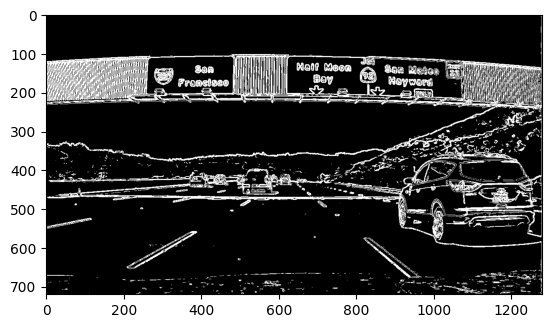

In [98]:
image = mpimg.imread("signs_vehicles_xygrad.png")
sobel = magnitude_gradient(image, min_thres=20, max_thres=100)
plt.imshow(sobel, cmap='gray')
mpimg.imsave("img.jpg", sobel)